Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Generate a synthetic dataset with multiple input variables (features) and a single output variable (label)

In [2]:
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)

Logistic Regression model (you can replace this with other models like SVM, RandomForest, etc.)

In [3]:
model = LogisticRegression()

# 1. K-Fold Cross-Validation

Definition: K-Fold divides the dataset into 'k' subsets (or folds). The model is trained on k-1 folds and tested on the remaining one fold.

Equation: Accuracy = (1/k) * sum(accuracy on each fold)

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
kf_accuracies = cross_val_score(model, X, y, cv=kf)

# 2. Stratified K-Fold Cross-Validation

Definition: Stratified K-Fold ensures that each fold has the same proportion of each class label.

Equation: Accuracy = (1/k) * sum(accuracy on each stratified fold)

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_accuracies = cross_val_score(model, X, y, cv=skf)

# 3. Leave-One-Out Cross-Validation (LOO)

Definition: LOO uses a single sample for testing while the remaining samples are used for training. It repeats this for all samples.

Equation: Accuracy = sum(accuracies on each sample) / total samples

In [6]:
loo = LeaveOneOut()
loo_accuracies = cross_val_score(model, X, y, cv=loo)

Printing results for comparison

In [7]:
print("K-Fold Cross-Validation Accuracy Scores: ", kf_accuracies)
print("Stratified K-Fold Cross-Validation Accuracy Scores: ", skf_accuracies)
print("Leave-One-Out Cross-Validation Accuracy Scores: ", loo_accuracies)

K-Fold Cross-Validation Accuracy Scores:  [0.75  0.775 0.875 0.775 0.8  ]
Stratified K-Fold Cross-Validation Accuracy Scores:  [0.725 0.85  0.85  0.875 0.875]
Leave-One-Out Cross-Validation Accuracy Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0.]


Average accuracy for each cross-validation technique

In [9]:
kf_avg_accuracy = np.mean(kf_accuracies)
skf_avg_accuracy = np.mean(skf_accuracies)
loo_avg_accuracy = np.mean(loo_accuracies)

print("\nAverage Accuracy for K-Fold: ", kf_avg_accuracy)
print("Average Accuracy for Stratified K-Fold: ", skf_avg_accuracy)
print("Average Accuracy for Leave-One-Out: ", loo_avg_accuracy)


Average Accuracy for K-Fold:  0.7949999999999999
Average Accuracy for Stratified K-Fold:  0.835
Average Accuracy for Leave-One-Out:  0.835


Visualization for comparison of cross-validation techniques

In [10]:
# Create a dataframe for visual comparison
cv_results = pd.DataFrame({
    'Cross-Validation Technique': ['K-Fold'] * len(kf_accuracies) + ['Stratified K-Fold'] * len(skf_accuracies) + ['Leave-One-Out'] * len(loo_accuracies),
    'Accuracy': np.concatenate([kf_accuracies, skf_accuracies, loo_accuracies])
})

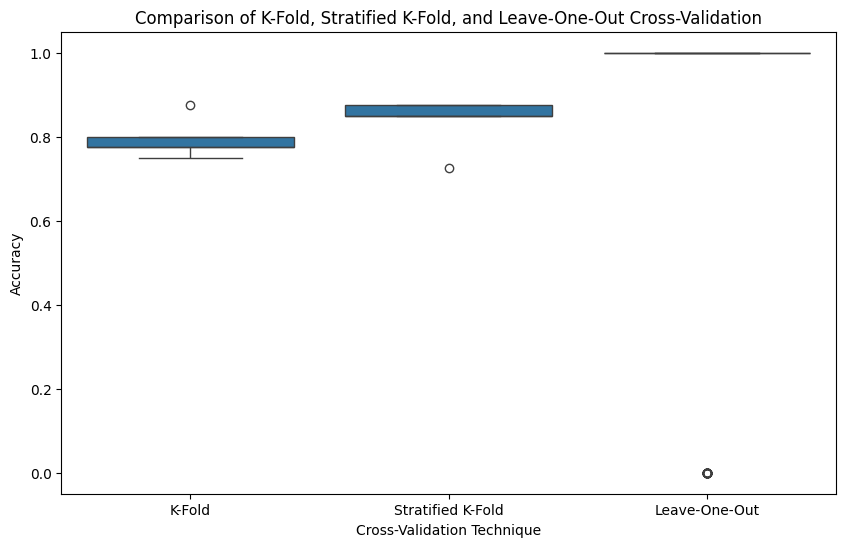

In [11]:
# Plot results using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cross-Validation Technique', y='Accuracy', data=cv_results)
plt.title('Comparison of K-Fold, Stratified K-Fold, and Leave-One-Out Cross-Validation')
plt.ylabel('Accuracy')
plt.xlabel('Cross-Validation Technique')
plt.show()